In [31]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [32]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [33]:
metrics_file = '../wf-outputs-interp/metrics/metrics-poly_interp_{}_bins.npy'

saving_folder ='../wf-outputs-interp/plots/'

In [34]:
n_bins_list = [8, 16, 32]

metrics_dict_list = [np.load(metrics_file.format(n_bins), allow_pickle=True)[()] for n_bins in n_bins_list]


In [8]:
pix_rmse, pix_std_rmse, pix_rel_rmse, pix_std_rel_rmse = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list)

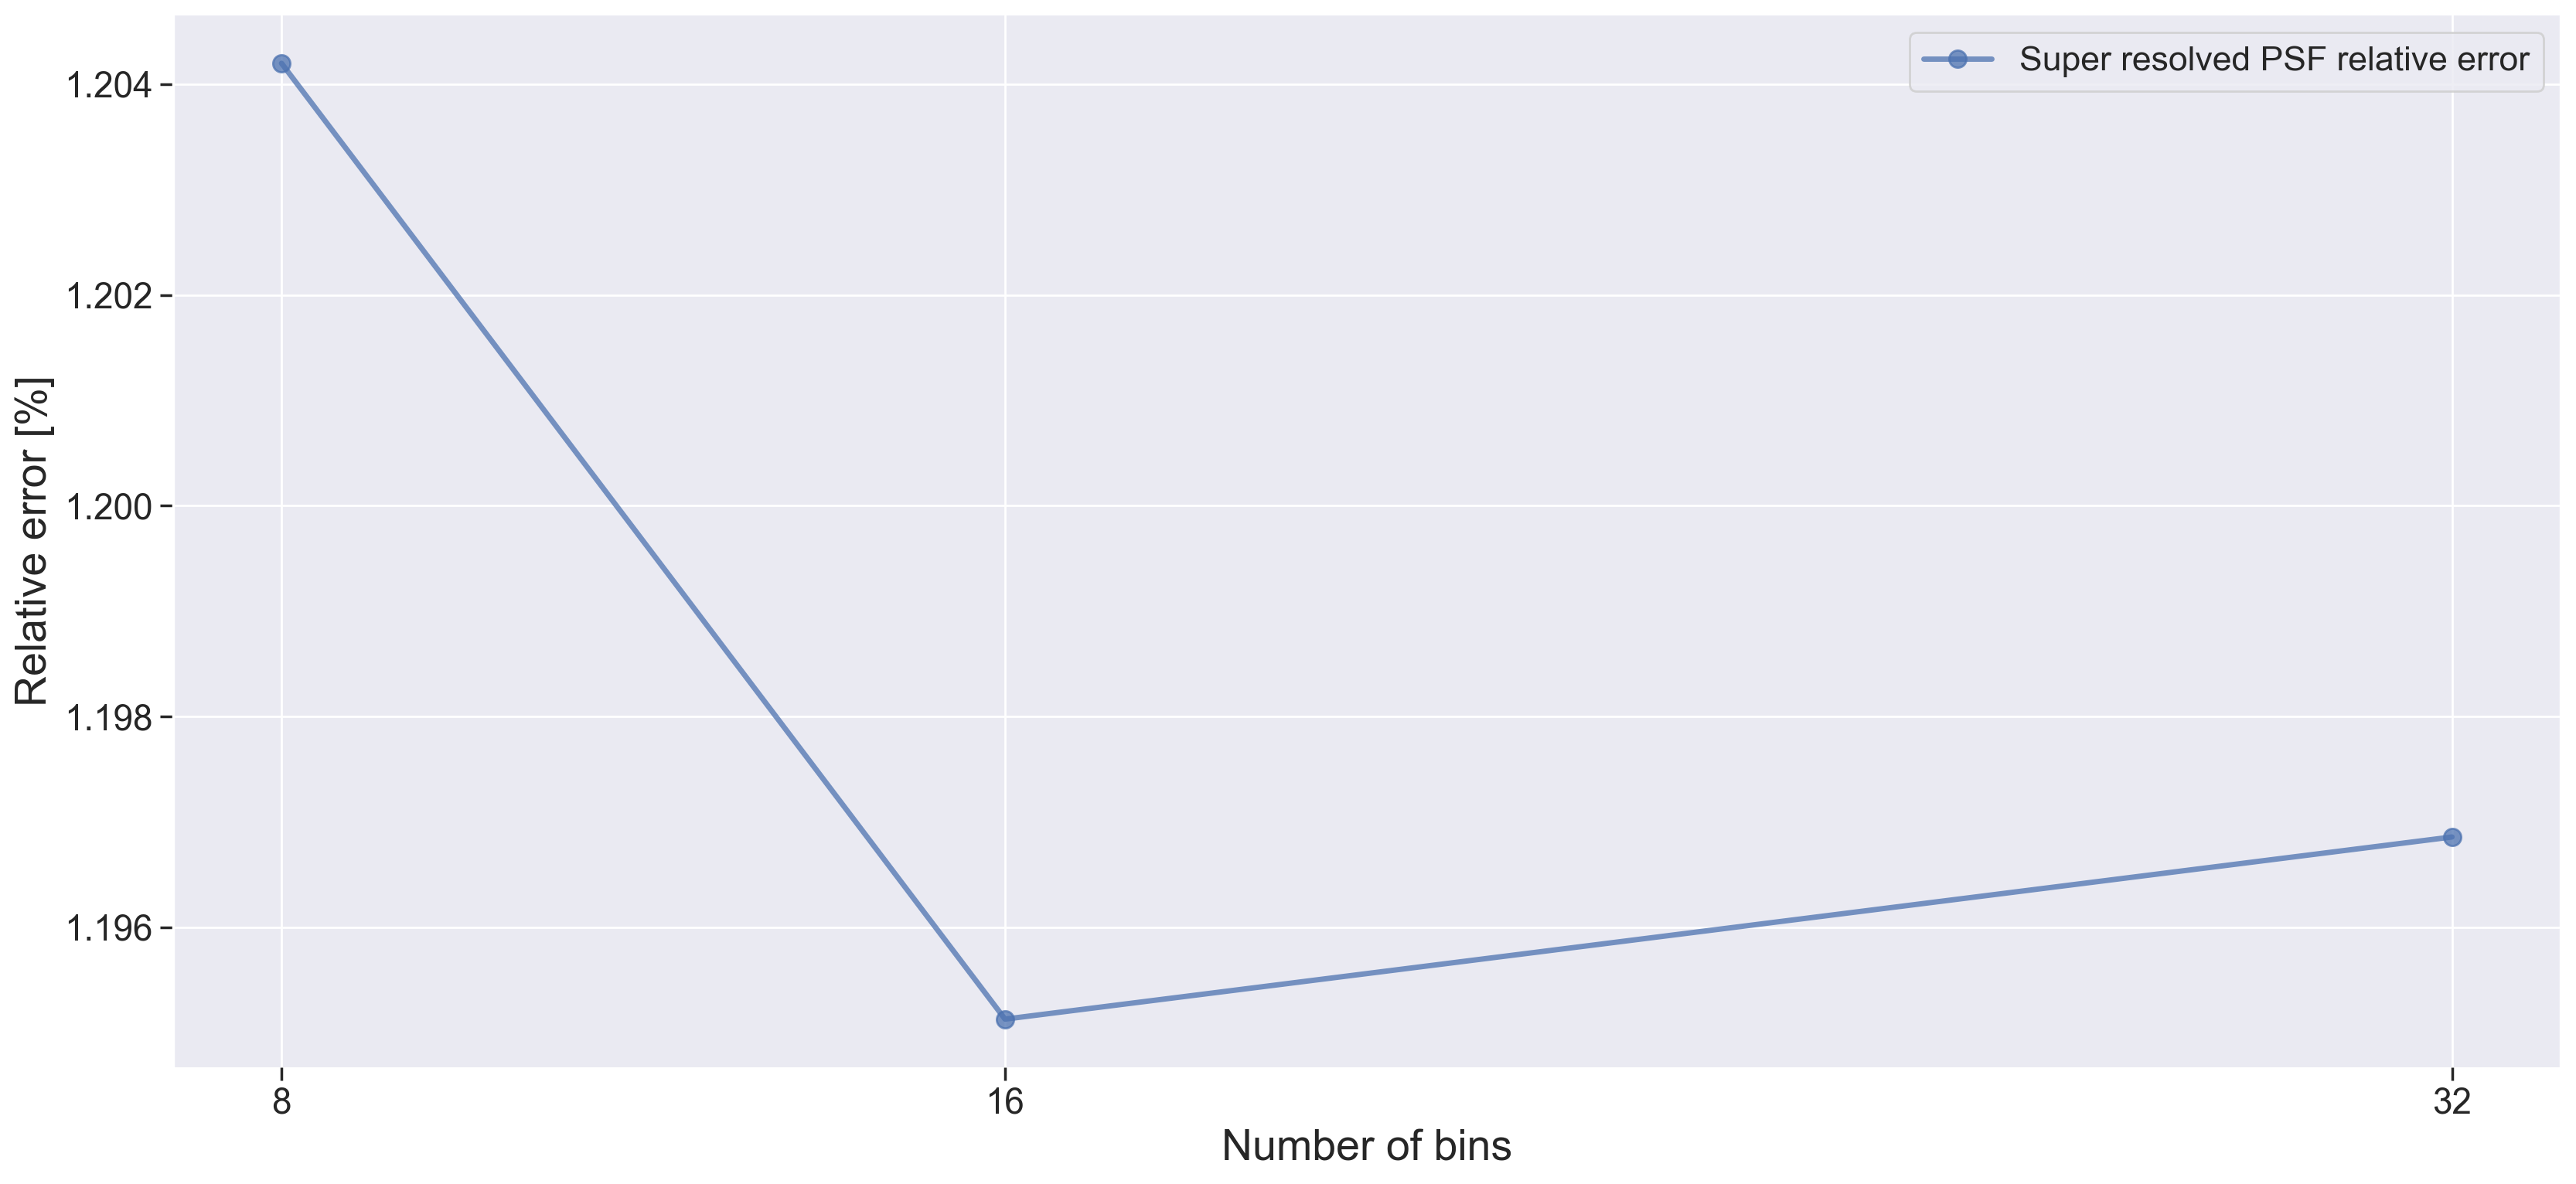

In [29]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(n_bins_list, pix_rel_rmse, label='Super resolved PSF relative error', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_bins_list)

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.set_xlabel('Number of bins', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PSF_RMSE_vs_interpolated_Nb_bins.pdf')
plt.show()

In [19]:
euclid_rmse, euclid_std_rmse, euclid_rel_rmse, euclid_std_rel_rmse = wf_psf.script_utils.extract_poly_results(metrics_dict_list)


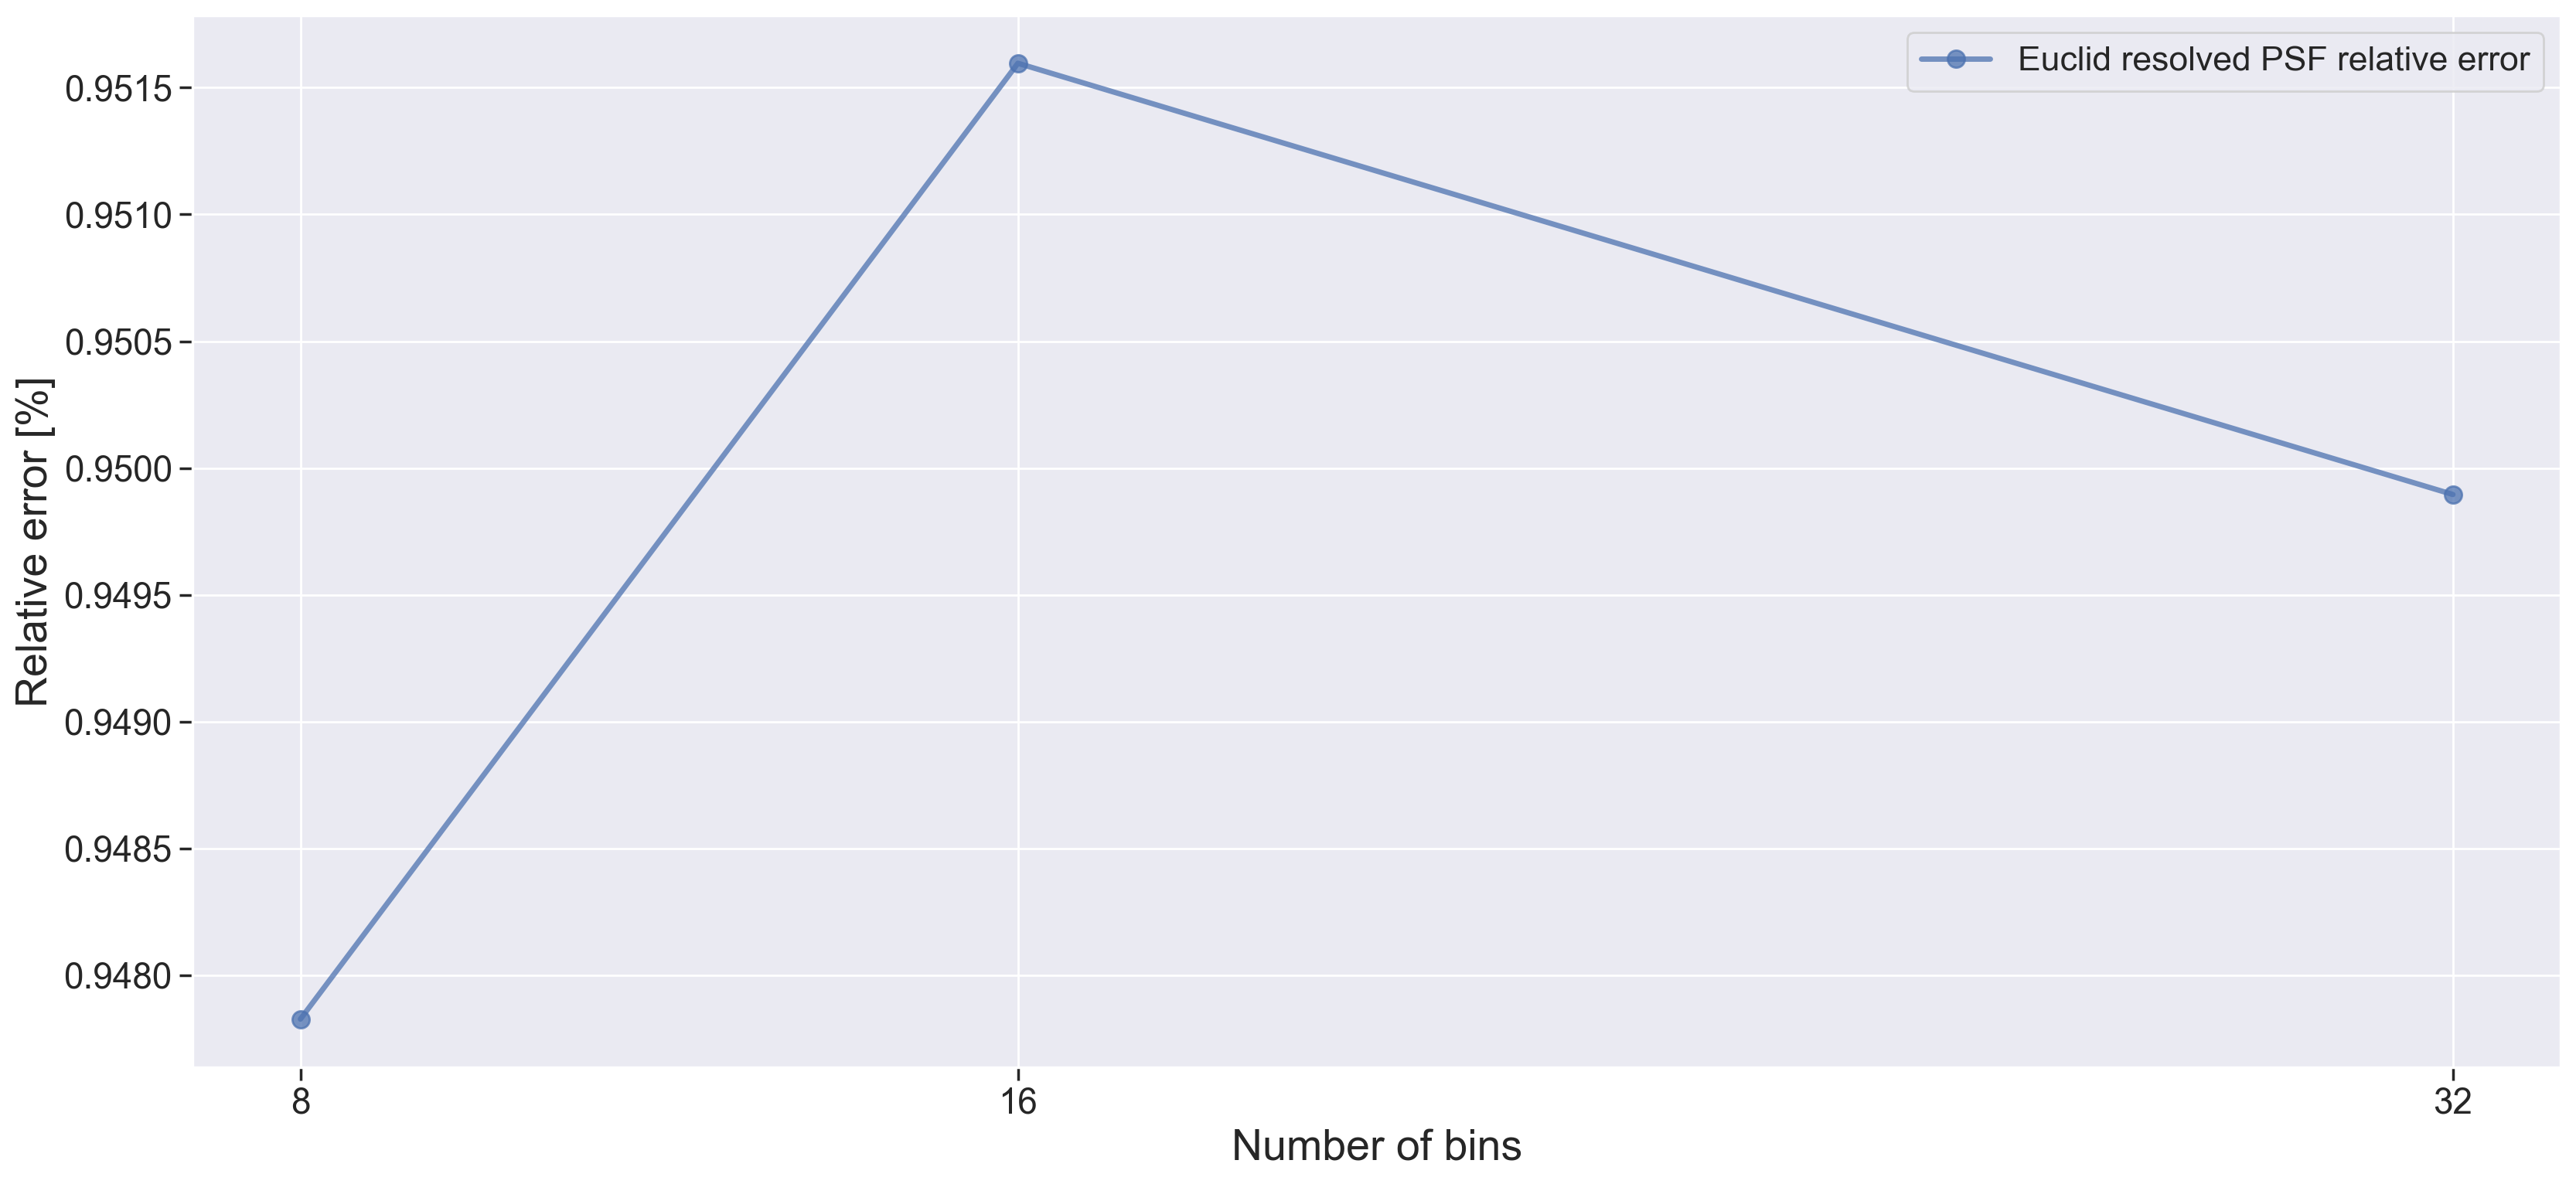

In [30]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(n_bins_list, euclid_rel_rmse, label='Euclid resolved PSF relative error', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_bins_list)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.set_xlabel('Number of bins', fontsize = 20)


#plt.savefig(saving_folder + 'ER_PSF_RMSE_vs_interpolated_Nb_bins.pdf')
plt.show()